In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-11-16/Ar fluo4-buffer

/Users/austinmcdonald/Desktop/data/Fluo4/8-11-16/Ar Fluo4-buffer


In [3]:
os.listdir()

['buffer-0.csv',
 'buffer-100.csv',
 'buffer-150.csv',
 'buffer-200.csv',
 'buffer-250.csv',
 'buffer-50.csv',
 'ccd-noise.csv']

In [7]:
backg = pd.read_csv('ccd-noise.csv',delimiter=",",names = ['wave','back'],skiprows=33,skipfooter=1,engine='python')
bf0 = pd.read_csv('buffer-0.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bf50 = pd.read_csv('buffer-50.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bf100 = pd.read_csv('buffer-100.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bf150 = pd.read_csv('buffer-150.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bf200 = pd.read_csv('buffer-200.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bf250 = pd.read_csv('buffer-250.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')


In [8]:
bf0['dif'] = bf0['sig'].diff().abs()
bf0['BS'] = bf0['sig']-backg['back']

bf50['dif'] = bf50['sig'].diff().abs()
bf50['BS'] = bf50['sig']-backg['back']

bf100['dif'] = bf100['sig'].diff().abs()
bf100['BS'] = bf100['sig']-backg['back']

bf150['dif'] = bf150['sig'].diff().abs()
bf150['BS'] = bf150['sig']-backg['back']

bf200['dif'] = bf200['sig'].diff().abs()
bf200['BS'] = bf200['sig']-backg['back']

bf250['dif'] = bf250['sig'].diff().abs()
bf250['BS'] = bf250['sig']-backg['back']

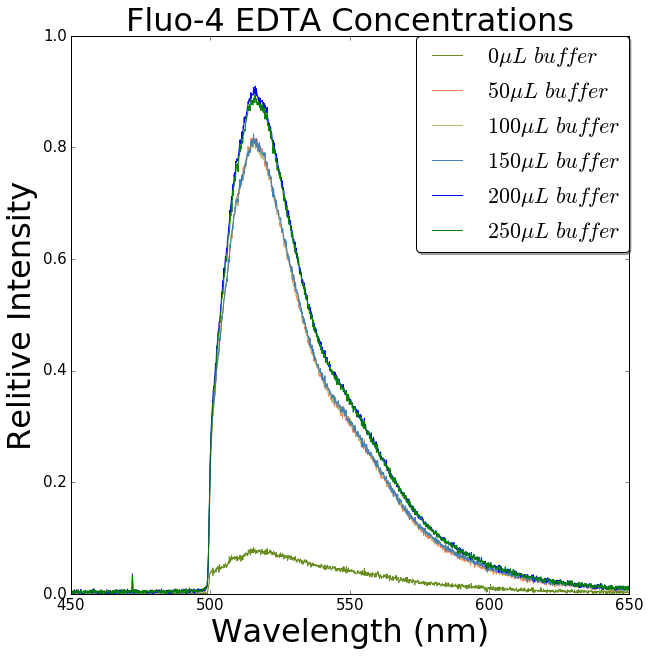

In [9]:
plt.figure(figsize=(10,10))

bf0f = bf0[bf0['dif']<.1]
bf50f = bf50[bf50['dif']<.1]
bf100f = bf100[bf100['dif']<.1]
bf150f = bf150[bf150['dif']<.1]
bf200f = bf200[bf200['dif']<.1]
bf250f = bf250[bf250['dif']<.1]





plt.plot(bf0f['wave'],bf0f['BS'],color='olivedrab',label=r'$0 \mu L$ $buffer$')
plt.plot(bf50f['wave'],bf50f['BS'],color='coral',label=r'$50 \mu L$ $buffer$')
plt.plot(bf100f['wave'],bf100f['BS'],color='darkkhaki',label=r'$100 \mu L$ $buffer$')
plt.plot(bf150f['wave'],bf150f['BS'],color='steelblue',label=r'$150 \mu L$ $buffer$')
plt.plot(bf200f['wave'],bf200f['BS'],color='blue',label=r'$200 \mu L$ $buffer$')
plt.plot(bf250f['wave'],bf250f['BS'],color='green',label=r'$250 \mu L$ $buffer$')

#plt.text(600, .65, r'$\frac{F_{max}}{F_{min}} = 12.57$', fontsize=25)

plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.title('Fluo-4 buf Concentrations', fontsize=32)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(450,650)
plt.ylim(0,1)
#plt.savefig('Ar_Fluo4_EDTA.pdf')

plt.show()